# --- 1. Perkenalan Dataset ---

## Dataset: Diabetes Health Dataset Analysis
- Sumber: Kaggle (Rabie El Kharoua) [https://www.kaggle.com/datasets/rabieelkharoua/diabetes-health-dataset-analysis]
- Deskripsi: Data kesehatan 1,879 pasien untuk analisis dan prediksi diabetes.
- Meliputi demografi, gaya hidup, riwayat medis, pengukuran klinis, medikasi, gejala,
- paparan lingkungan, perilaku kesehatan, dan variabel target Diagnosis (0: No, 1: Yes).

# --- 2. Import Library ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# --- 3. Memuat Dataset ---

In [2]:
# Load Dataset
raw_data_path = "../namadataset_raw/diabetes_data.csv"
df = pd.read_csv(raw_data_path)
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [3]:
print("\nInformasi dasar dataset:")
df.info()


Informasi dasar dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes 

In [4]:
print("\nStatistik deskriptif dataset:")
df.describe()


Statistik deskriptif dataset:


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


In [5]:
# --- 4. Exploratory Data Analysis (EDA) ---

print("\nJumlah missing values per kolom:")
print(df.isnull().sum())
# Visualisasi Missing Values (jika ada)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Visualisasi Missing Values')
    plt.show()
else:
    print("Tidak ada missing values dalam dataset.")


Jumlah missing values per kolom:
PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedic

In [6]:
print(f"\nJumlah data duplikat: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("Menghapus data duplikat...")
    df.drop_duplicates(inplace=True)
    print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")
else:
    print("Tidak ada data duplikat.")


Jumlah data duplikat: 0
Tidak ada data duplikat.


# 4. Exploratory Data Analyst (EDA)

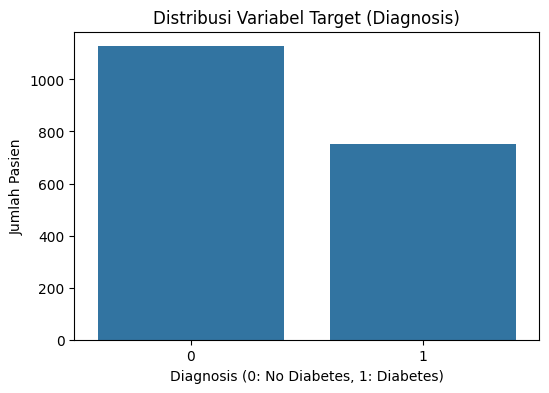


Distribusi Diagnosis:
Diagnosis
0    0.599787
1    0.400213
Name: proportion, dtype: float64


In [7]:
# Analisis Variabel Target (Diagnosis)
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribusi Variabel Target (Diagnosis)')
plt.xlabel('Diagnosis (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah Pasien')
plt.show()
print("\nDistribusi Diagnosis:")
print(df['Diagnosis'].value_counts(normalize=True))

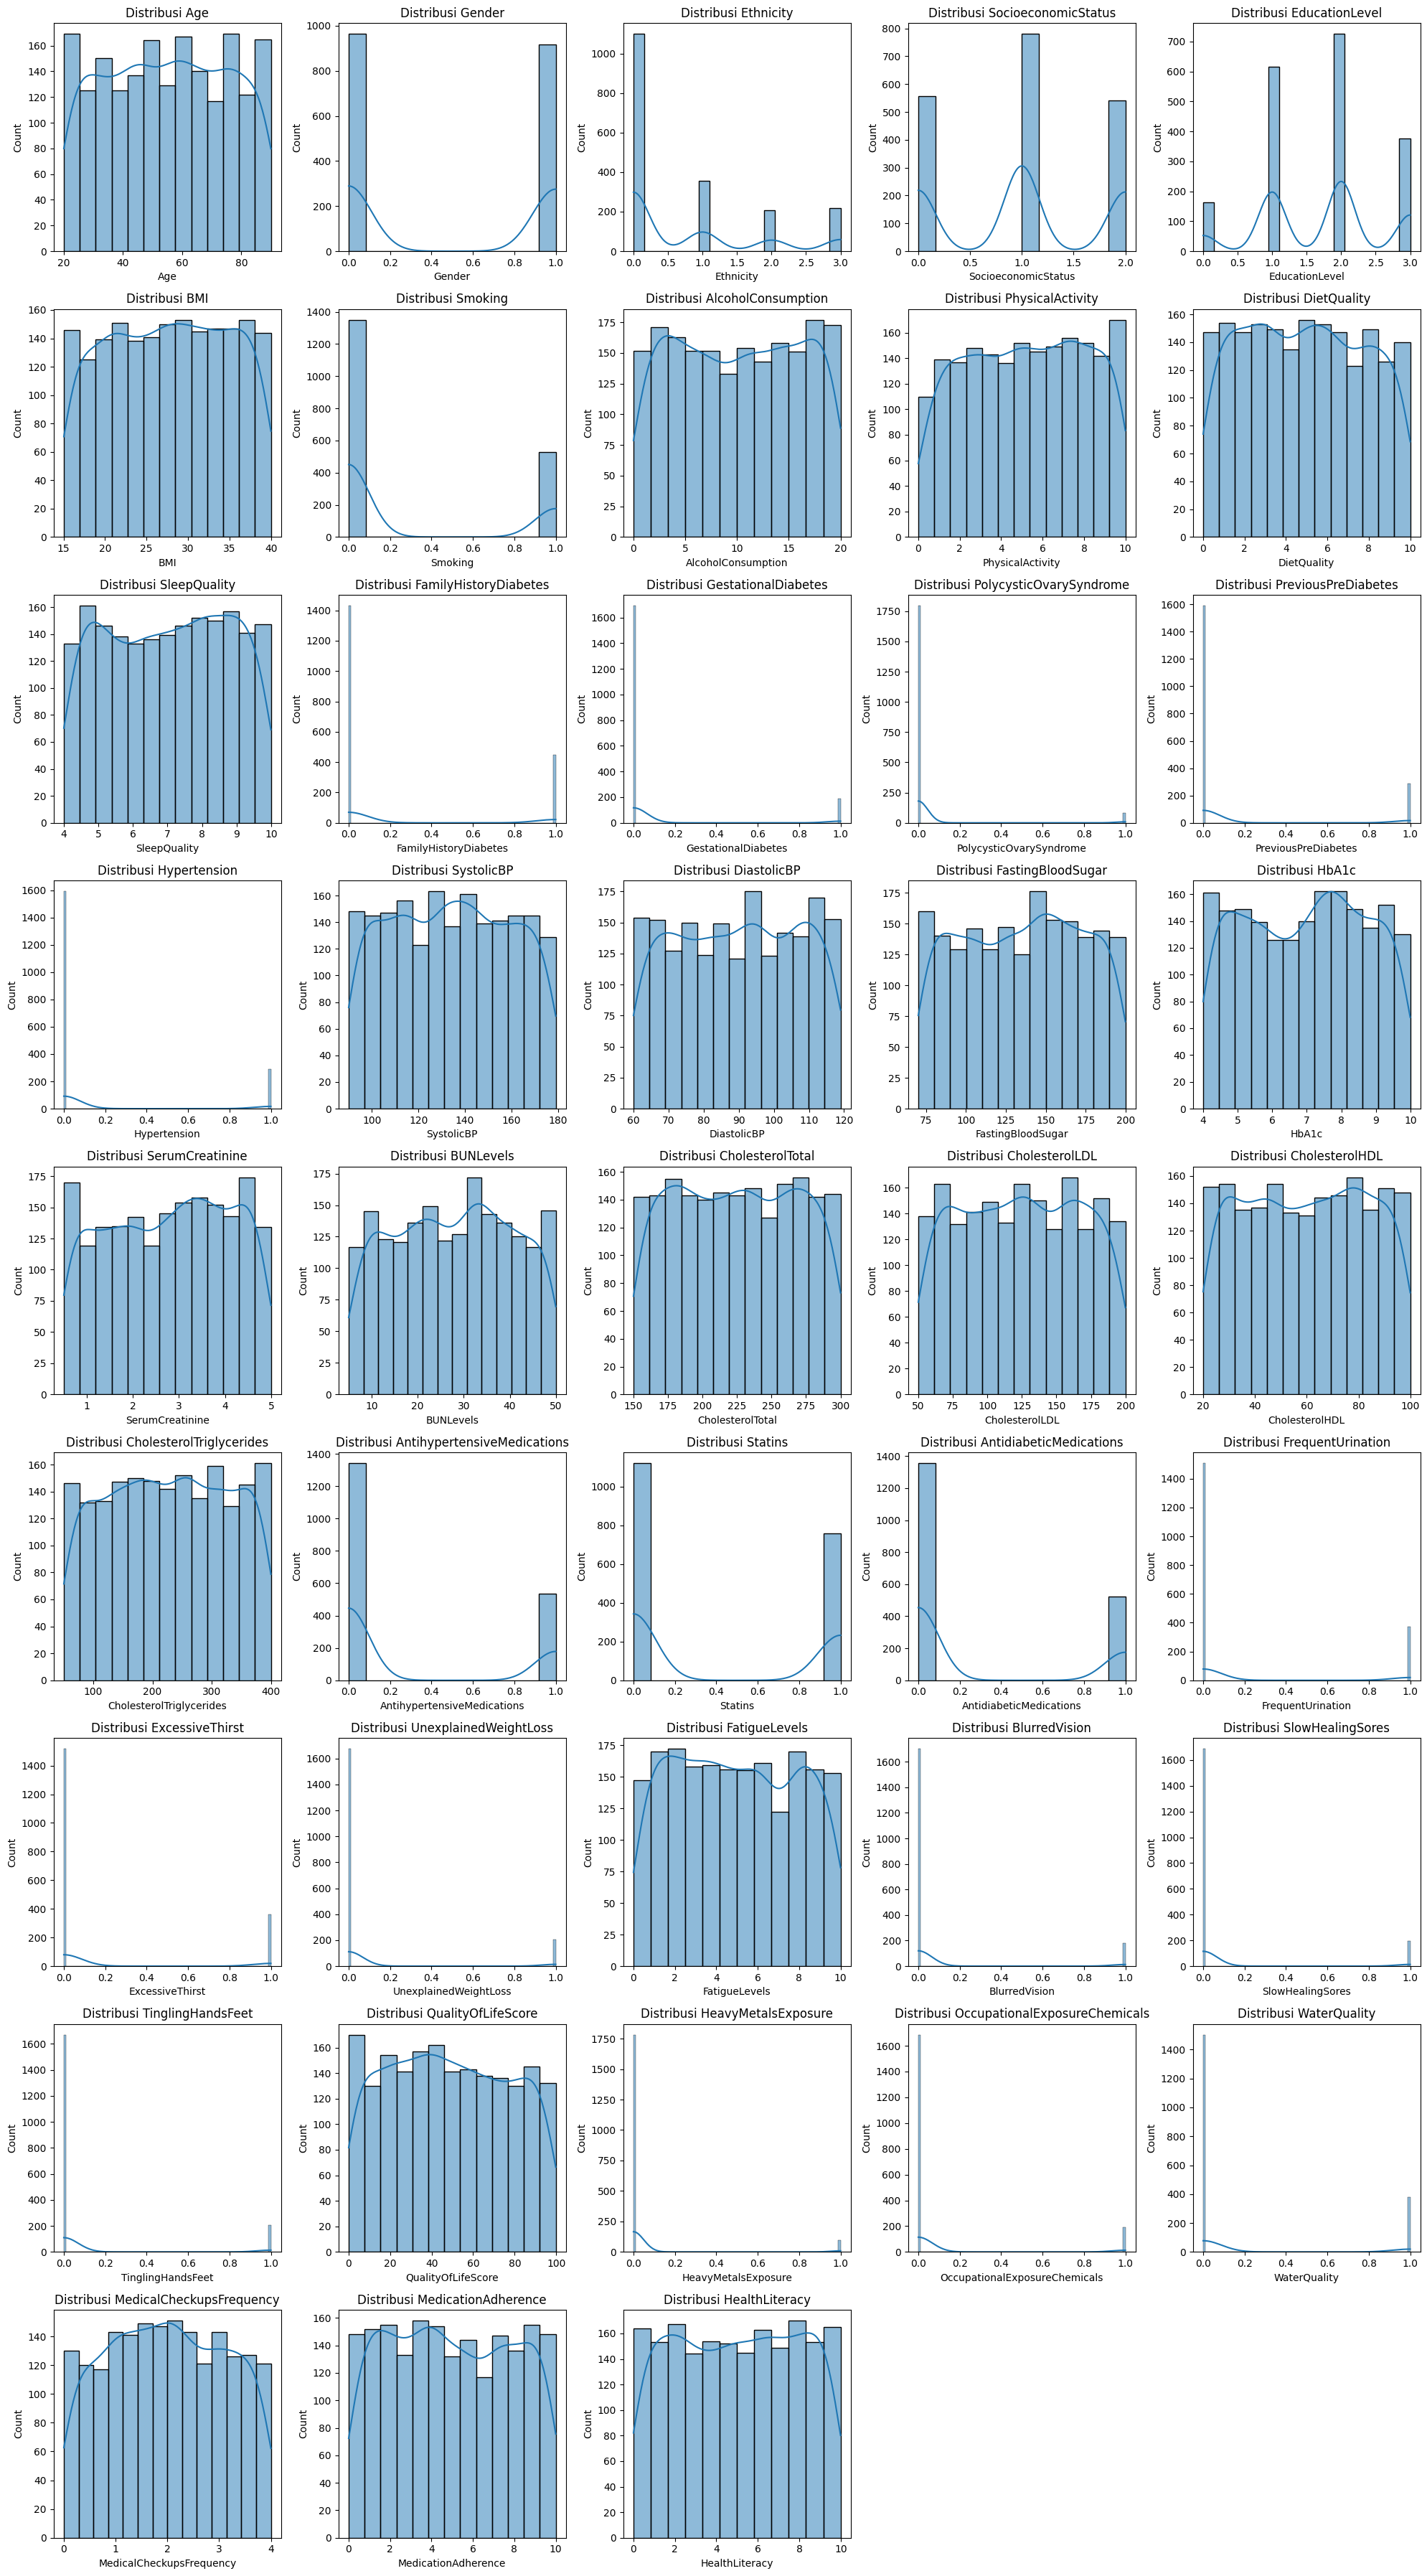

In [8]:
# Distribusi Variabel Numerik
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'PatientID' in numerical_cols: numerical_cols.remove('PatientID')
if 'Diagnosis' in numerical_cols: numerical_cols.remove('Diagnosis') # Target variable

if len(numerical_cols) > 0:
    num_plots = len(numerical_cols)
    num_rows = (num_plots + 4) // 5 # Calculate rows needed for 5 columns per row
    plt.figure(figsize=(20, num_rows * 4))
    for i, col in enumerate(numerical_cols):
        plt.subplot(num_rows, 5, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribusi {col}')
        plt.tight_layout()
    plt.show()


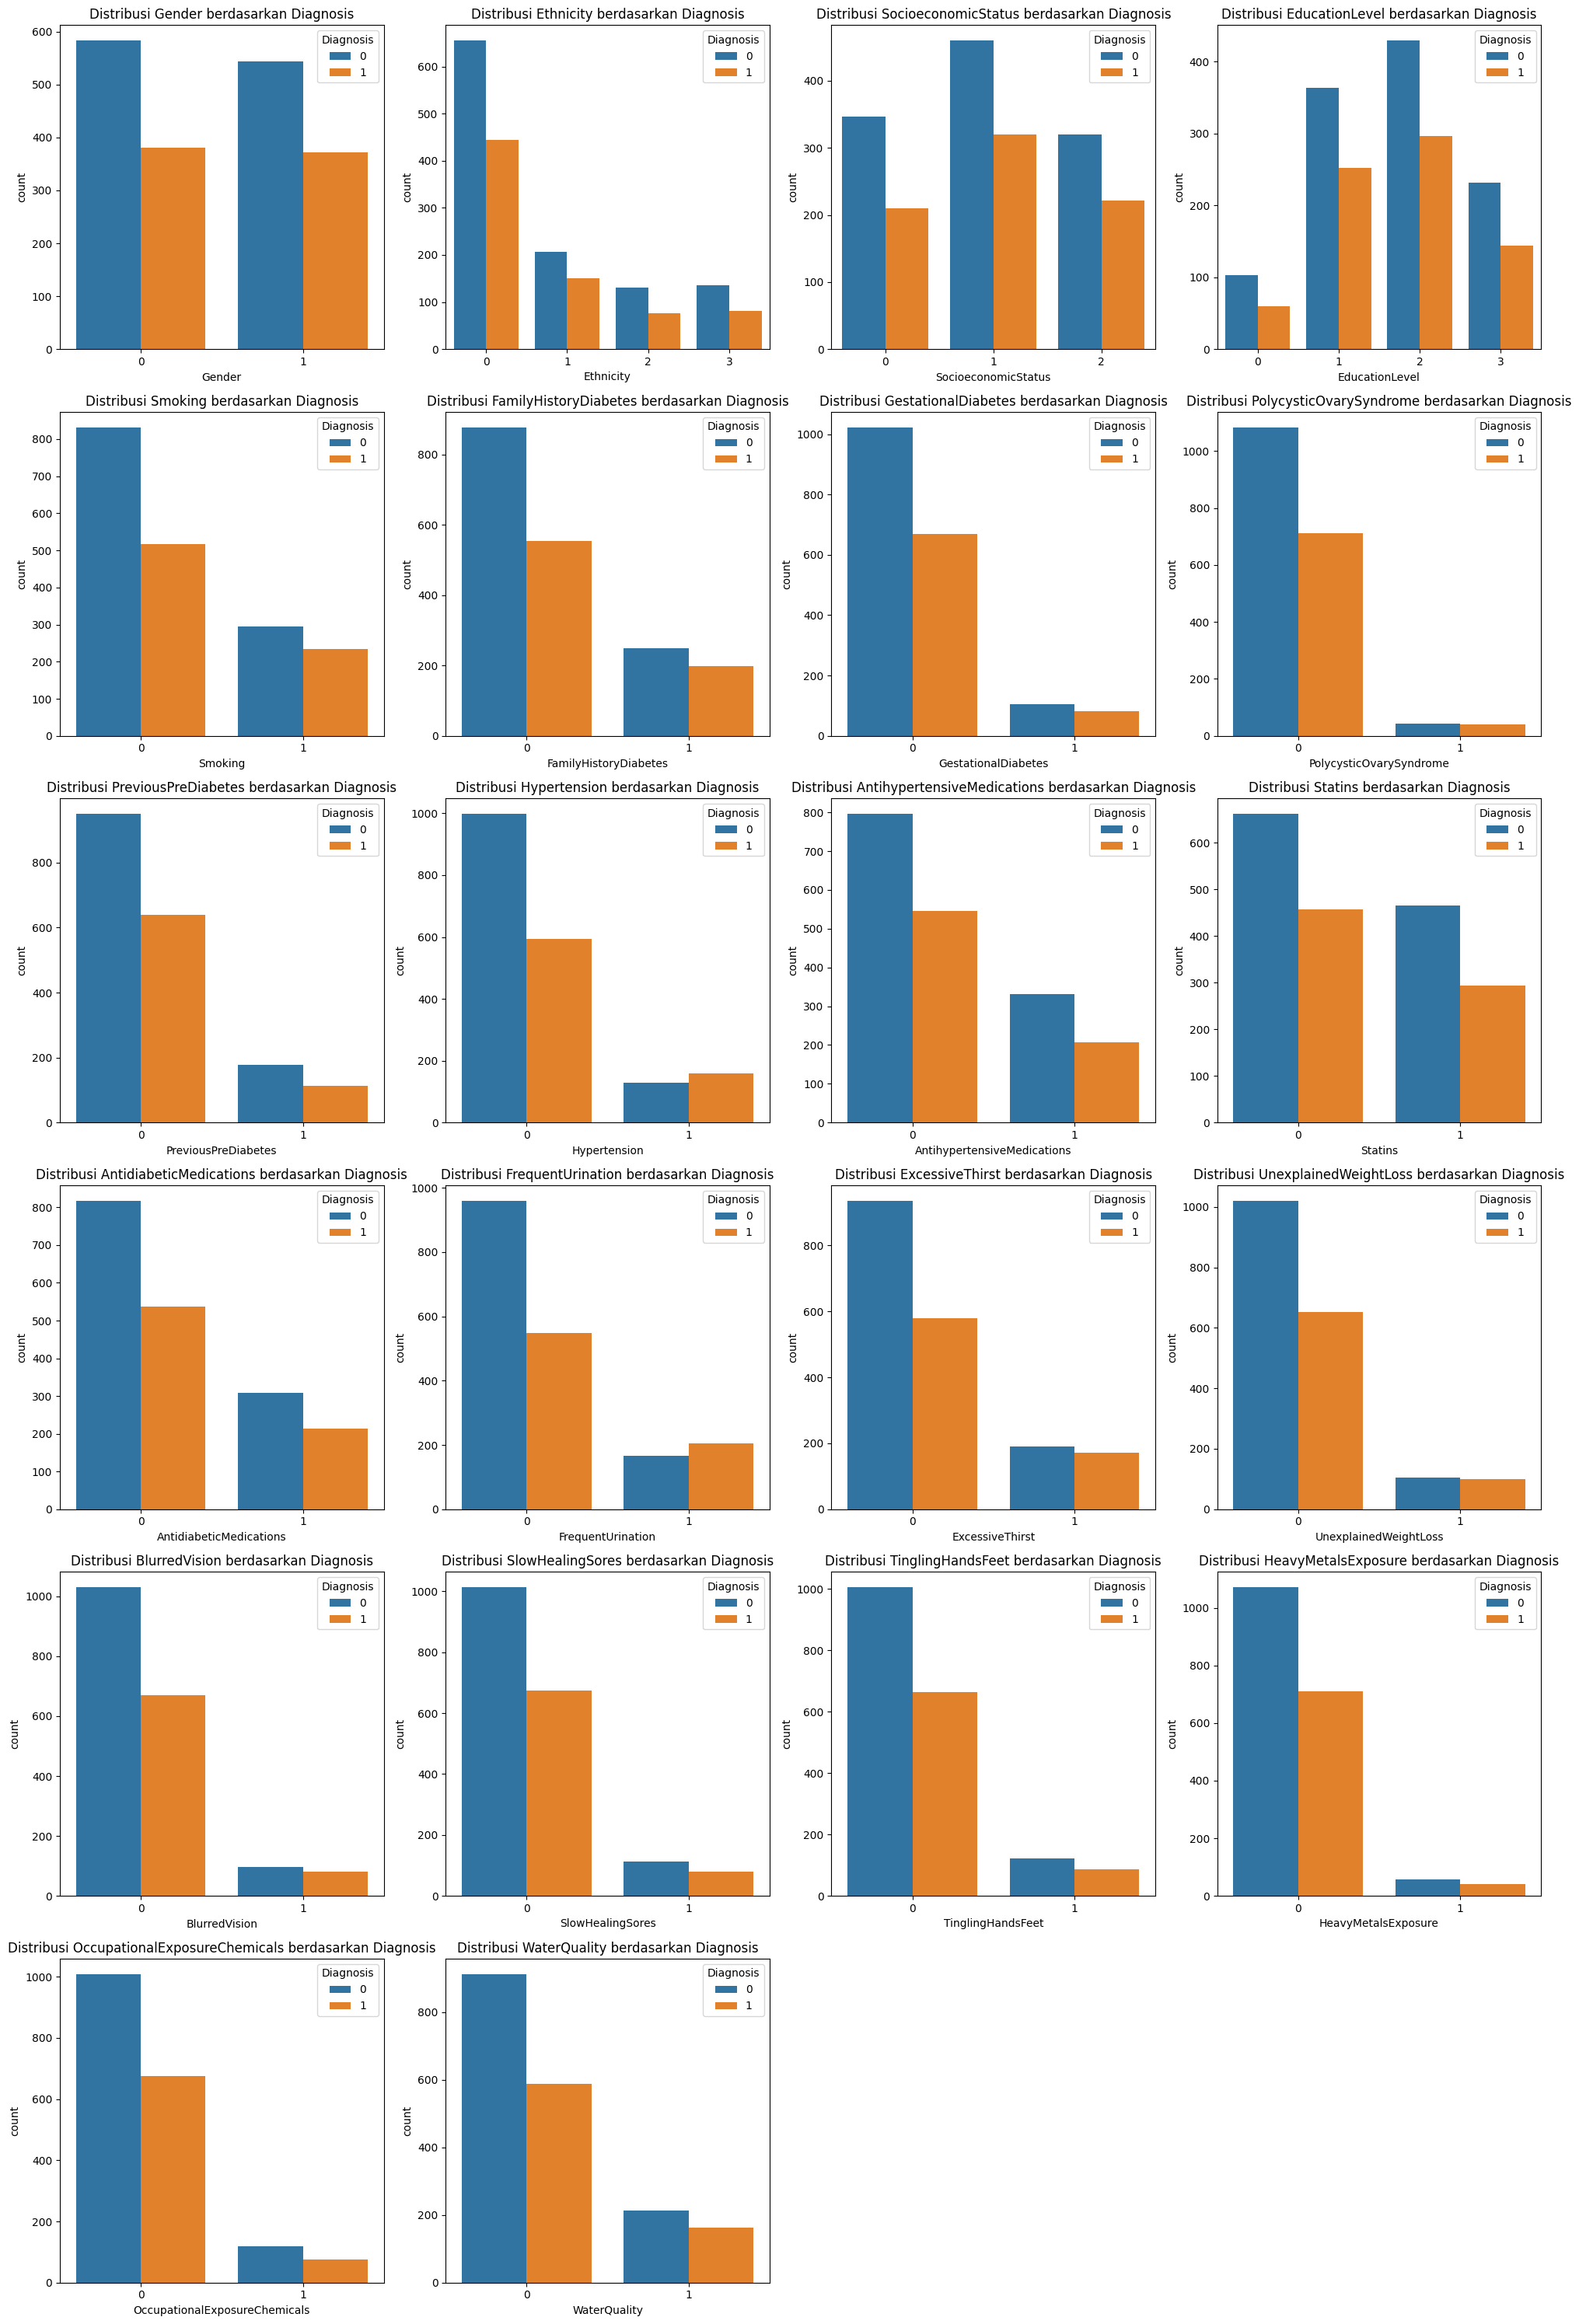

In [9]:
# Analisis Variabel Kategorikal (binary dan multi-kategori)
categorical_features_for_plotting = [
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
    'Smoking', 'FamilyHistoryDiabetes', 'GestationalDiabetes',
    'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
    'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
    'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
    'BlurredVision', 'SlowHealingSores', 'TinglingHandsFeet',
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
]

num_plots_cat = len(categorical_features_for_plotting)
num_rows_cat = (num_plots_cat + 3) // 4 # Calculate rows for 4 columns per row
plt.figure(figsize=(20, num_rows_cat * 5))
for i, col in enumerate(categorical_features_for_plotting):
    plt.subplot(num_rows_cat, 4, i + 1)
    sns.countplot(x=col, data=df, hue='Diagnosis')
    plt.title(f'Distribusi {col} berdasarkan Diagnosis')
    plt.tight_layout()
plt.show()

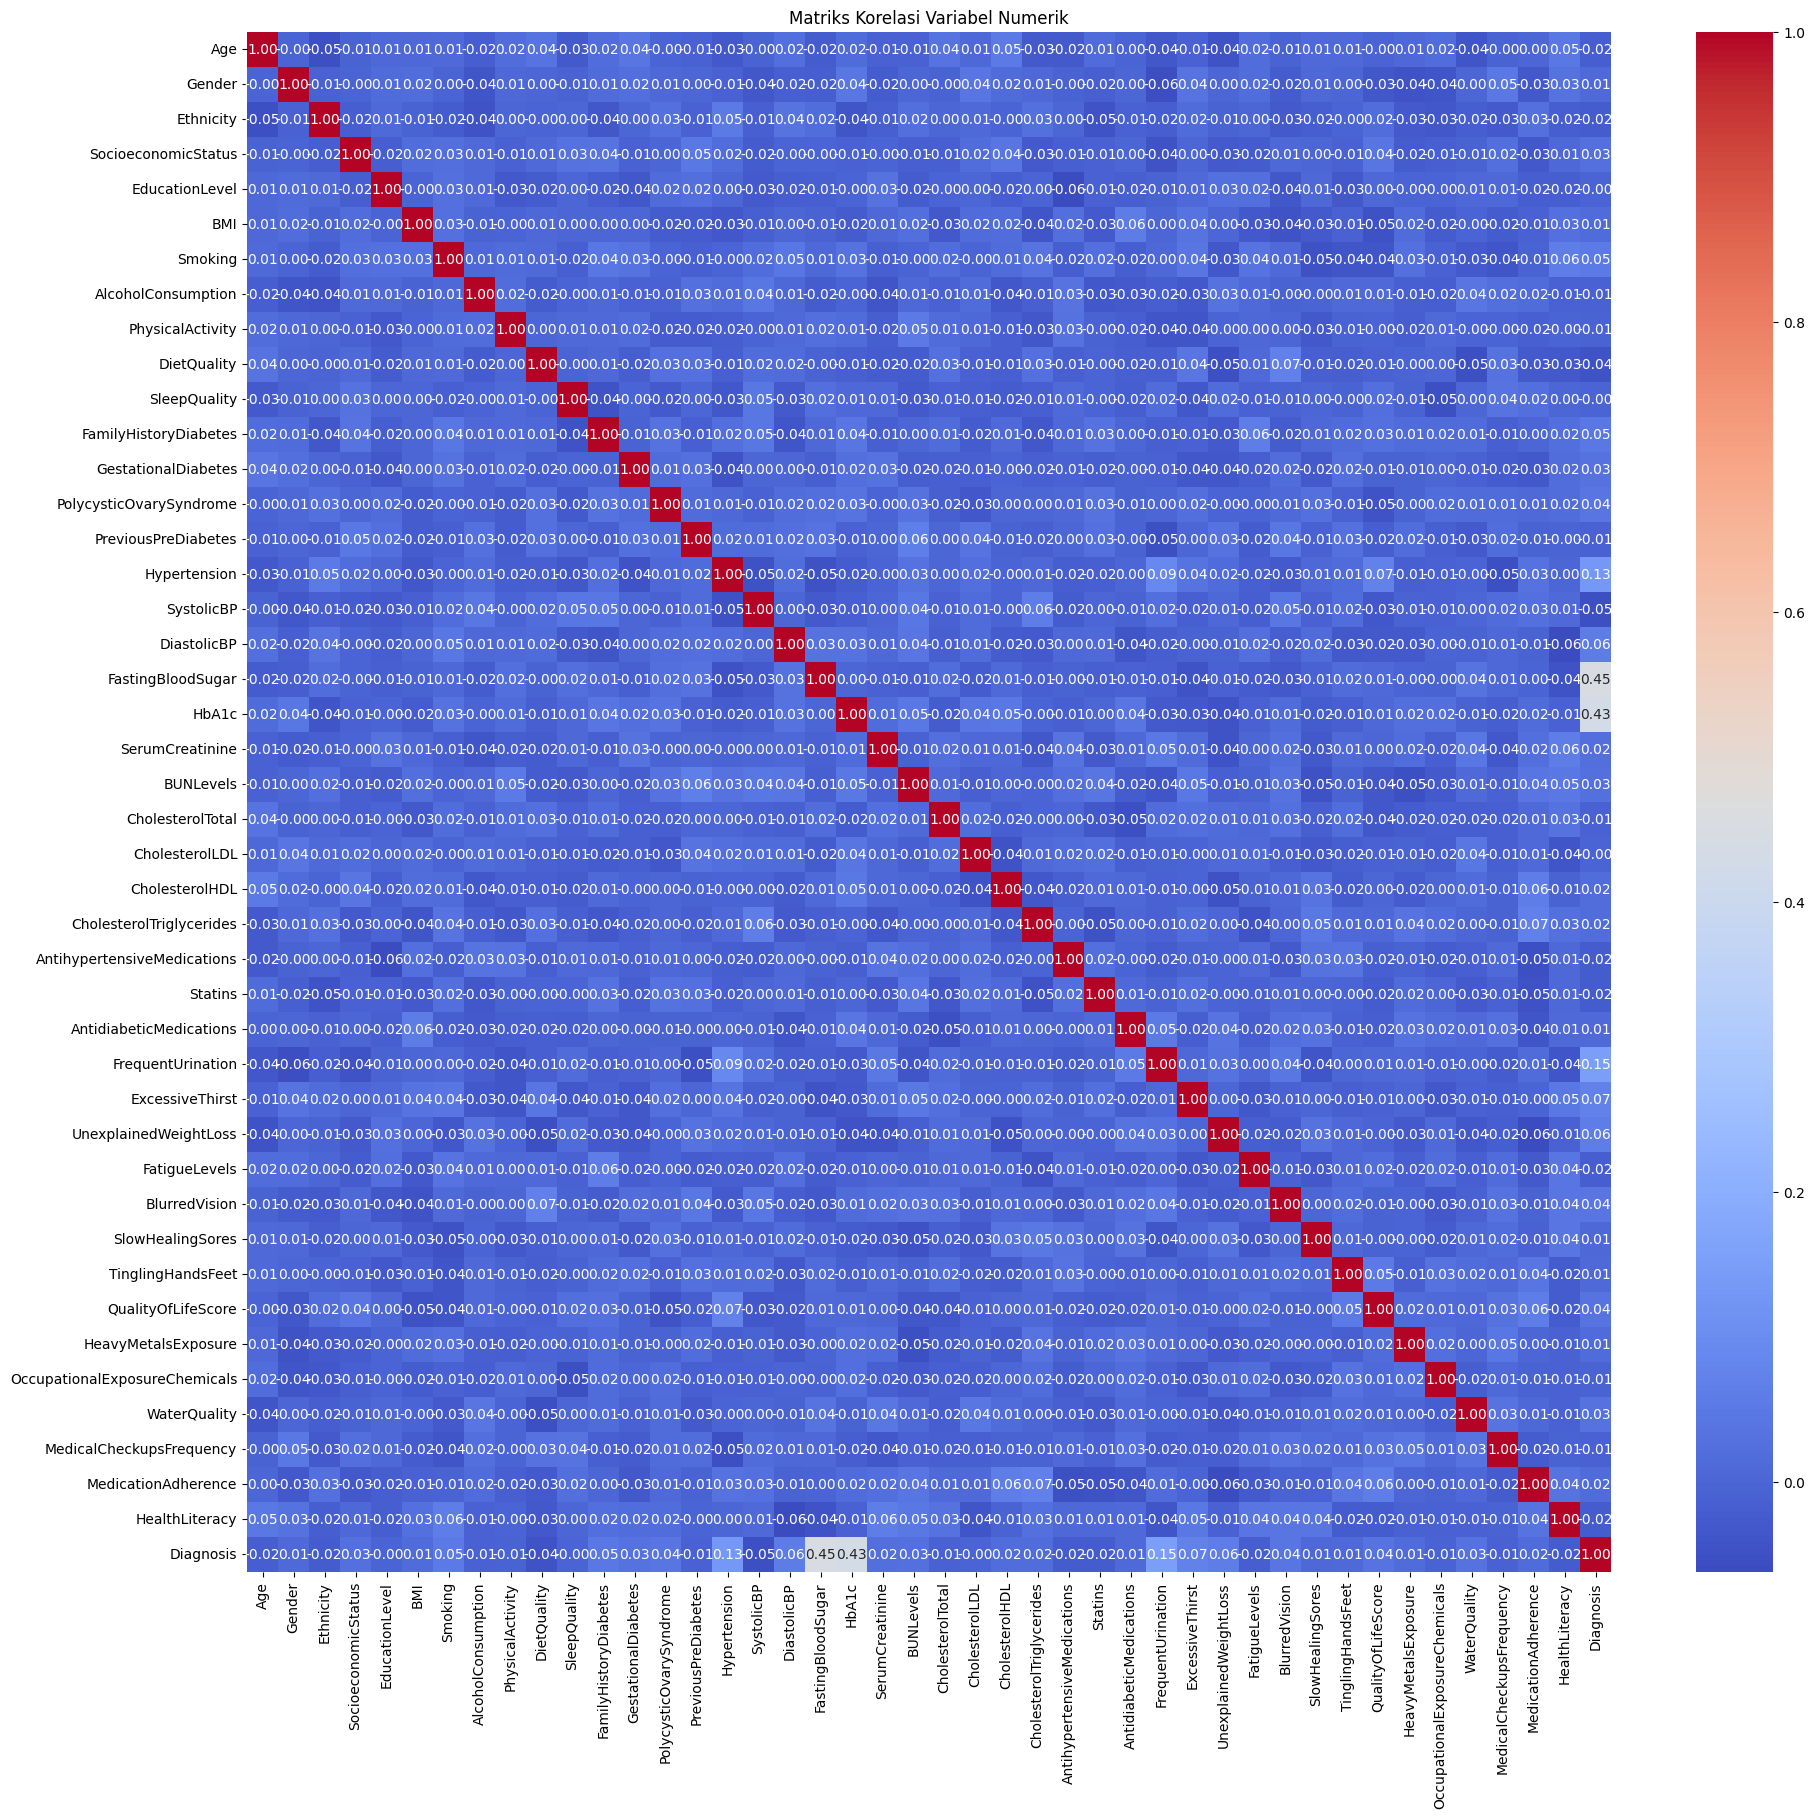

In [10]:
# Korelasi antar Variabel Numerik
if len(numerical_cols) > 1:
    plt.figure(figsize=(22, 20))
    corr_matrix = df[numerical_cols + ['Diagnosis']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriks Korelasi Variabel Numerik')
    plt.show()

# --- 5. Data Preprocessing ---

In [11]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(['PatientID', 'Diagnosis'], axis=1) # PatientID juga dihapus
y = df['Diagnosis']


In [12]:
# Identifikasi kolom berdasarkan tipe data dan kebutuhan preprocessing
numeric_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
    'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'FatigueLevels', 'QualityOfLifeScore',
    'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy'
]

In [13]:
# Kolom kategorikal non-biner yang akan di-OneHotEncode
categorical_features_to_encode = [
    'Ethnicity', 'SocioeconomicStatus', 'EducationLevel'
]

In [14]:
# Kolom biner (0/1) yang tidak perlu encoding tambahan, hanya pass-through
binary_features = [
    'Gender', 'Smoking', 'FamilyHistoryDiabetes', 'GestationalDiabetes',
    'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
    'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
    'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
    'BlurredVision', 'SlowHealingSores', 'TinglingHandsFeet',
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
]

In [15]:
# Memastikan semua kolom X terdaftar dalam salah satu kategori fitur
all_identified_features = numeric_features + categorical_features_to_encode + binary_features
if set(X.columns) != set(all_identified_features):
    print("Warning: Ada ketidaksesuaian antara kolom X dan kolom yang diidentifikasi untuk preprocessing!")
    print(f"Kolom di X tapi tidak diidentifikasi: {set(X.columns) - set(all_identified_features)}")
    print(f"Kolom diidentifikasi tapi tidak ada di X: {set(all_identified_features) - set(X.columns)}")


Kolom di X tapi tidak diidentifikasi: {'DoctorInCharge'}
Kolom diidentifikasi tapi tidak ada di X: set()


In [16]:
# Buat preprocessor menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), # Scaling untuk numerik
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_to_encode), # One-Hot Encoding
        ('bin', 'passthrough', binary_features) # Membiarkan biner apa adanya
    ],
    remainder='drop' # Buang kolom yang tidak teridentifikasi
)

In [17]:
# Membuat pipeline preprocessing
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [22]:
# Terapkan preprocessing
X_preprocessed_array = preprocessor.fit_transform(X)

In [29]:
# Mendapatkan nama kolom setelah preprocessing
numeric_cols_transformed = numeric_features
ohe_feature_names = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat']
categorical_cols_transformed = ohe_feature_names.get_feature_names_out(categorical_features_to_encode)
transformed_column_names = numeric_cols_transformed + list(categorical_cols_transformed) + binary_features

# Buat DataFrame dari data yang sudah diproses
X_preprocessed_df = pd.DataFrame(X_preprocessed_array, columns=transformed_column_names, index=X.index)



In [30]:
# Gabungkan kembali fitur (X) dan target (y) menjadi satu DataFrame
# Reset index y untuk memastikan kesesuaian saat concat
y_reset_index = y.reset_index(drop=True)
df_preprocessed = pd.concat([X_preprocessed_df, y_reset_index], axis=1)


In [31]:
print("\nBentuk data setelah preprocessing:", df_preprocessed.shape)
print("Lima baris pertama data setelah preprocessing:")
df_preprocessed.head()


Bentuk data setelah preprocessing: (1879, 52)
Lima baris pertama data setelah preprocessing:


,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,...,FrequentUrination,ExcessiveThirst,UnexplainedWeightLoss,BlurredVision,SlowHealingSores,TinglingHandsFeet,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,Diagnosis
0,-0.538416,0.736909,-0.946653,-0.965393,0.001057,-1.718582,-1.603098,-0.973463,0.759421,1.326985,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,-0.197125,1.701079,-1.440586,1.085505,1.411289,0.281561,1.208631,0.527391,1.416918,0.201700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,1.655596,-1.099636,-1.508511,0.316010,0.986171,0.397372,-0.587751,0.065590,-0.199992,-1.663525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-1.659799,0.652280,-1.417635,1.206012,-0.032011,-0.424972,1.364839,-0.165311,-1.400213,-0.264241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-1.367264,-1.513271,0.907540,-0.200055,-0.824400,1.590389,1.208631,-1.204363,-1.185447,-0.787228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [32]:
print("\nInformasi data setelah preprocessing:")
df_preprocessed.info()


Informasi data setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1879 non-null   float64
 1   BMI                            1879 non-null   float64
 2   AlcoholConsumption             1879 non-null   float64
 3   PhysicalActivity               1879 non-null   float64
 4   DietQuality                    1879 non-null   float64
 5   SleepQuality                   1879 non-null   float64
 6   SystolicBP                     1879 non-null   float64
 7   DiastolicBP                    1879 non-null   float64
 8   FastingBloodSugar              1879 non-null   float64
 9   HbA1c                          1879 non-null   float64
 10  SerumCreatinine                1879 non-null   float64
 11  BUNLevels                      1879 non-null   float64
 12  Cholester

In [33]:
# Simpan data yang sudah diproses
output_dir = 'namadataset_preprocessing/'
os.makedirs(output_dir, exist_ok=True) 
output_filepath = os.path.join(output_dir, 'preprocessed_diabetes_data.csv')
df_preprocessed.to_csv(output_filepath, index=False)
print(f"\nData yang sudah diproses berhasil disimpan ke: {output_filepath}")



Data yang sudah diproses berhasil disimpan ke: namadataset_preprocessing/preprocessed_diabetes_data.csv


In [34]:
# Pembagian Data Pelatihan dan Pengujian 
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nBentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_test: {y_test.shape}")


Bentuk X_train: (1503, 51)
Bentuk X_test: (376, 51)
Bentuk y_train: (1503,)
Bentuk y_test: (376,)
